In [6]:
import os
import cv2
import torch
from ultralytics import YOLO
from pathlib import Path


In [11]:
# Ruta al modelo entrenado
MODEL_PATH = r"../runs/detect/train/weights/best.pt"

# Carpeta con imágenes de campo
INPUT_DIR = r"../data/raw/detection/campo"

# Carpeta donde se guardarán los recortes
OUTPUT_DIR = r"../data/raw/classification/pendiente"

# Crear carpeta si no existe
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Umbral mínimo de área (3%)
MIN_AREA_RATIO = 0.03

# Formatos permitidos
VALID_EXTENSIONS = (".jpg", ".jpeg", ".webp")

print("Configuración cargada correctamente.")


Configuración cargada correctamente.


In [12]:
model = YOLO(MODEL_PATH)
print("Modelo YOLO cargado correctamente.")

Modelo YOLO cargado correctamente.


In [13]:
def procesar_imagen(image_path, contador):
    img = cv2.imread(image_path)

    if img is None:
        print(f"Error al cargar: {image_path}")
        return contador

    h_img, w_img, _ = img.shape
    area_img = h_img * w_img

    resultados = model(img)[0]

    if resultados.boxes is None:
        return contador

    for box in resultados.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        w = x2 - x1
        h = y2 - y1
        area_box = w * h

        area_ratio = area_box / area_img

        # Filtro B: descartar hojas pequeñas
        if area_ratio < MIN_AREA_RATIO:
            continue

        recorte = img[y1:y2, x1:x2]

        nombre_salida = f"leaf_{contador:06d}.jpg"
        ruta_salida = os.path.join(OUTPUT_DIR, nombre_salida)

        cv2.imwrite(ruta_salida, recorte)

        contador += 1

    return contador


In [14]:
contador_global = 1
imagenes_procesadas = 0

for archivo in os.listdir(INPUT_DIR):
    if archivo.lower().endswith(VALID_EXTENSIONS):
        ruta_img = os.path.join(INPUT_DIR, archivo)
        contador_global = procesar_imagen(ruta_img, contador_global)
        imagenes_procesadas += 1

print(f"Proceso finalizado.")
print(f"Imágenes de campo procesadas: {imagenes_procesadas}")
print(f"Hojas recortadas guardadas en pendiente/: {contador_global - 1}")



0: 640x384 25 leafs, 154.6ms
Speed: 41.0ms preprocess, 154.6ms inference, 22.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 11 leafs, 67.0ms
Speed: 2.8ms preprocess, 67.0ms inference, 4.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 13 leafs, 56.9ms
Speed: 2.6ms preprocess, 56.9ms inference, 6.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 7 leafs, 74.9ms
Speed: 3.9ms preprocess, 74.9ms inference, 6.2ms postprocess per image at shape (1, 3, 640, 384)

0: 512x640 10 leafs, 94.9ms
Speed: 4.0ms preprocess, 94.9ms inference, 5.4ms postprocess per image at shape (1, 3, 512, 640)

0: 256x640 5 leafs, 75.4ms
Speed: 1.7ms preprocess, 75.4ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 640)

0: 384x640 22 leafs, 78.4ms
Speed: 2.9ms preprocess, 78.4ms inference, 4.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 17 leafs, 62.8ms
Speed: 2.9ms preprocess, 62.8ms inference, 4.0ms postprocess per image at shape (1, 3, 

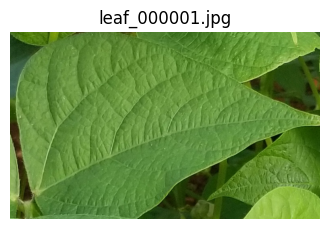

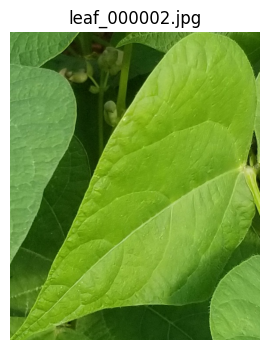

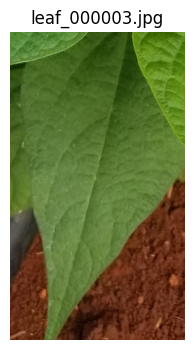

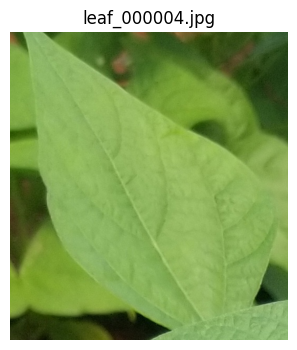

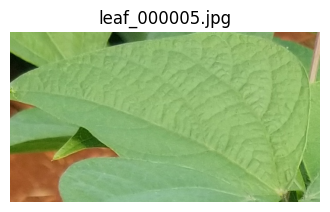

In [15]:
import matplotlib.pyplot as plt

ejemplos = os.listdir(OUTPUT_DIR)[:5]

for img_name in ejemplos:
    img_path = os.path.join(OUTPUT_DIR, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.axis("off")
    plt.title(img_name)
    plt.show()
